<a href="https://colab.research.google.com/github/PabloMendieta03/AprendizajeAutomatico-/blob/main/ClasificadorDeImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **P1 AA Configuración y Entrenamiento de una Red de Neuronas_23_24**






Carmen Gallardo Martín, Marta Herraiz Méndez, Pablo Mendieta Ruiz

**ENUNCIADO:**
Crea un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

En esta práctica se tratan los principios fundamentales de las redes neuronales artificiales utilizando un modelo de aprendizaje profundo para abordar un problema real: el reconocimiento y la clasificación de imágenes de ropa. Usando la biblioteca Keras, hemos definido, configurado y entrenado un modelo de red neuronal artificial para realizar esta tarea de clasificación.

A lo largo de la práctica, se han abordado cuestiones como la preparación de datos, la normalización de imágenes, la construcción del modelo, la elección de funciones de activación, optimizadores y funciones de pérdida, así como la evaluación del modelo. También exploramos técnicas de visualización para comprender mejor como se comporta nuestra red neuronal y como se desempeña en la clasificación de imágenes.

Respecto a la organización de la práctica, todos los miembros del equipo han contribuido de manera equitativa al proceso. Hemos trabajado de forma colaborativa, desarrollando el código de manera conjunta, compartiendo explicaciones y distribuyendo tareas de manera equilibrada.



## **LIBRERIAS Y FUNCIONES USADAS**

In [ ]:
# Importamos todas las librerias necesarias

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from tensorflow.keras.layers import Flatten

from keras.datasets import fashion_mnist

from keras import utils
from keras.utils import to_categorical
from keras.utils import model_to_dot

import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

#función para la creación de los modelos
def crear_Network (NneuronasCapa1, funcionActivacion, Optimizador, FuncionPerd):
    network = models.Sequential()

    #Agregamos la capa Flatten (explicada en el pre-procesado de datos)
    network.add(layers.Flatten(input_shape=(28, 28)))
    #Añadimos una capa densa (totalmente conectada)
    network.add(layers.Dense(NneuronasCapa1, activation=funcionActivacion, input_shape=(28*28,)))
    #capa de salida (10 posibles salidas)
    network.add(layers.Dense(10, activation='softmax'))

    keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

    # Optimizador, función de perdida y métricas
    network.compile(optimizer=Optimizador, loss=FuncionPerd,
                    metrics=['accuracy'])

    return network

#función para entrenar los modelos con los datos
#Insertamos como dato de entrada las etiquetas para poder diferenciar entre las categóricas y no categóricas(PUNTO 7)
def entrenar(network, ep, labels):
  network.fit(train_images, labels, epochs = ep, batch_size=128)
  return network

#función para la evaluación
def evaluar(network, labels):
  test_loss, test_acc = network.evaluate(test_images, labels)
  print("Loss", test_loss)
  print('Accuracy', test_acc)
  return

#función para realizar matrices de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

#Funciones para graficar en el punto 6
def plot_image(i, predictions_array, true_label, img, class_names):
  pedictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array)
  plt.imshow(img, cmap=plt.cm.binary)
  if predicted_label == true_label :
    color = 'blue'
  else :
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                     100*np.max(predictions_array),
                                     class_names[true_label]),
                                     color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## **PRE-PROCESADO DE DATOS**



Vamos a utilizar el conjunto de imagenes Fashion-MNIST, este conjunto de datos está formado por imágenes de ropa y accesorios en una escala de grises. Las imágenes son de 28x28 píxeles, cada píxel puede tomar un valor entre 0 y 255, siendo el 255 el negro más oscuro.

Fashion-MNIST contiene 10 clases:

0 - Camiseta/top

1 - Pantalón

2 - Suéter

3 - Vestido

4 - Abrigo

5 - Sandalia

6 - Camisa

7 - Zapatilla deportiva

8 - Bolso

9 - Botines

Los datos están formados por 60K imagenes de entrenamiento y 10K imagenes de test. Todas ellas con su etiqueta correspondiente.

Tamaño del conjunto de imagenes: 
Imágenes de entrenamiento:  (60000, 28, 28)
Imágenes de test:  (10000, 28, 28)
Imagen número 30000: 
[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 21

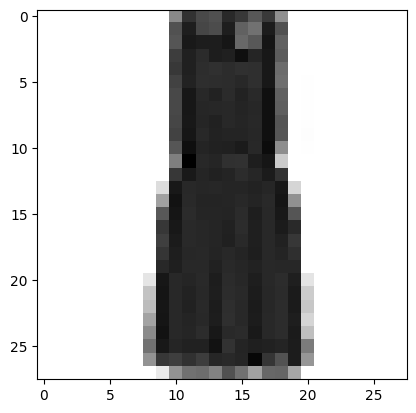

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Tamaño del conjunto de imagenes: ")
print("Imágenes de entrenamiento: ", train_images.shape)
print("Imágenes de test: ", test_images.shape)

#Vemos la matriz de la imagen número 30.000 (28x28)
print("Imagen número 30000: ")
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30000]))
# Vemos que la imagen número 30.000 corresponde al número 3(dress)
print("Etiqueta correspondiente:", train_labels[30000])

# Veamos el elemento 30000 y pintémoslo con matplotlib

digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


Ahora vamos a proceder a realizar alguna transformación en los datos para optimizar el proceso. En vez de utilizar la función reshape, vamos a aprovechar la función de keras "flatten". Como tenemos imagenes de 28x28 píxeles, con flatten vamos a transformar esas matrices en vectores unidimensionales de 784 elementos. Lo que hace la función "flatten" es aplanar los datos manteniendo el mismo orden.

Por otro lado, vamos a modificar las etiquetas a tipo categórico, para que cada etiqueta sea un vector de tamaño 9, donde cada posición del 0 al 9 es la probabilidad de que esa imagen corresponda a cada una de las 9 clasificaciones. De esta manera todos vectores serán 0 con un 1 en la posición con la que equivalga la imagen (en este caso no tiene que ver con la probabilidad ya que son las etiquetas dadas, por eso son vectores binarios, pero posteriormente con las predicciones sí son probabilidades). De esta manera se trabaja con one-hot encoding.

In [ ]:
#train_images = train_images.reshape((60000, 28 * 28))
#test_images = test_images.reshape((10000, 28 * 28))

#Preparación de etiquetas
print("Etiquetas originales: ")
print(train_labels)

train_labels_Cat = to_categorical(train_labels)
test_labels_Cat = to_categorical(test_labels)
# Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# la imagen 30000 de entrenamiento es 3 (dress)

print("=Etiquetas tras la función to_categorical:")
print(test_labels_Cat)


Etiquetas originales: 
[9 0 0 ... 3 0 5]
=Etiquetas tras la función to_categorical:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Por último, vamos a normalizar los datos para tratar de obtener una convergencia más rápida. Como nuestros datos se tratan de imágenes con una escala de grises y el valor máximo es 255 de los píxeles, dividimos por 255 para poder obtener unos datos que vayan del 0 al 1.

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

## **CONSTRUCCIÓN DE LA RED DE NEURONAS**

### **PUNTO 1**
Configuración y entrenamiento de los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados



Se van a utilizar distintas funciones de activación y optimizadores. La función de activación se encarga de modificar la función de propagación y de dar una salida a la neurona no lineal. Es esencial que sirva para añadir la 'no linealidad' ya que gracias a esto la red neuronal podrá modificar sus pesos y aprender. Cada neurona en la red neuronal cuenta con su propia función de activación. Las funciones de activación que se van a usar son ReLU (Rectified Linear Unit) y sigmoid (Sigmoide). La función ReLU actúa como un interruptor que activa la neurona si la entrada es positiva y no activa si es negativa, en cambio la función sigmoid comprime los valores de entrada entre 0 y 1.

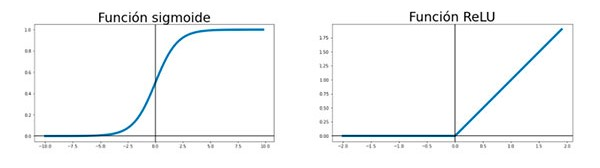


El optimizador se encarga de disminuir la función de pérdida y de ajustar los pesos durante el entrenamiento. Vamos a utilizar dos tipos, el SGD (descenso de gradiente estocástico) y el RMSprop (Root Mean Square Propagation). SGD actualiza los parámetros del modelo con un solo ejemplo de entrenamiento a la vez, siendo eficiente y escalable. En cambio, RMSprop ajusta la tasa de aprendizaje individualmente para cada parámetro, adaptándose mejor a problemas con gradientes variables.

En el entrenamiento que se va a realizar se van a usar 5 épocas por cada modelo. Cada época es una iteración completa a través de todo el conjunto de entrenamiento. Con cada época mejora el modelo, pero, hay que tener en cuenta que puede haber un momento en el cual el sistema pueda sufrir un sobreajuste. En ese caso diremos que el sistema ha aprendido patrones erróneos y estará sesgado, al probarlo se verá que está sobre-entrenado.


In [ ]:

NNeuronasC1 = [10, 10, 10, 10, 512, 512, 512, 512 ]
Fa = ["relu" , "relu", "sigmoid", "sigmoid","relu" , "relu", "sigmoid", "sigmoid" ]
optimizador = ["sgd", "rmsprop", "sgd", "rmsprop","sgd", "rmsprop","sgd", "rmsprop"]

network = [0]*8
for i in range (8):
  print("Modelo", i+1)
  modelo = crear_Network (NNeuronasC1[i], Fa[i], optimizador[i],'categorical_crossentropy')
  modelo = entrenar(modelo, 5, train_labels_Cat)
  network[i] = modelo
  print("\n")




Modelo 1
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4965 - accuracy: 0.4917
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8437 - accuracy: 0.6994
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7177 - accuracy: 0.7504
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6513 - accuracy: 0.7789
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.6089 - accuracy: 0.7943


Modelo 2
Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.8587 - accuracy: 0.7262
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5321 - accuracy: 0.8198
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4876 - accuracy: 0.8338
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4651 - accuracy: 0.8404
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4501 - accurac

**caso 1**

*10 neuronas, función de activación: relu, optimizador: rmsprop*

La primera capa tiene 7850 parámetros entrenables y la segunda 110. Durante las 5 épocas se entrena el modelo y se actualizan los pesos, podemos ver la evolución con 'loss' y 'accuracy'

Con la primera época conseguimos una precisión de 0.49 y una pérdida de 1.5 aproximadamente. Lo ideal es que la pérdida disminuya a medida que la precisión aumenta. Esto sucede en este caso, ya que, en la época 5 conseguimos una precisión de 0.79 y una pérdida de 0.6. Con ReLu la función se actualiza de tal forma que si la salida es positiva toma el valor de la salida abierta y si es negativa el 0.

**caso 2**

*10 neuronas, función de activación: relu, optimizador: sgd*

Igual que el anterior, tenemos 7960 parámetros entrenables.
La pérdida disminuye y la precisión aumenta con cada época. Esto sugiere que el modelo está aprendiendo y mejorando en el conjunto de datos de entrenamiento.
La precisión inicial es de 0.7 y al final del entrenamiento alcanza alrededor del 0.85 disminuyendo la pérdida a 0.45.

Al igual que el primer modelo, se observa una mejora significativa en la precisión y la pérdida durante el entrenamiento.

Al comparar ambos modelos, parece que el segundo modelo alcanza una precisión ligeramente mayor ya que la precisión final es mayor y la pérdida final menor. Lo que cambia del caso 1 es el optimizador, en este caso se utiliza el descenso de gradiente estocástico, consiste en utilizar la información sobre cuánto se equivoca el sistema en función de los datos que se esperan.

**caso 3**

*10 neuronas, función de activación: sigmoid, optimizador: sgd*

Igual que el anterior, tenemos 7960 parámetros entrenables.

Debido al alto valor de pérdida inicial y bajo valor de precisión podemos confirmar que la función de activación da unos valores más lejanos que relu al principio. Pero se ajusta rápido ya que en 5 épocas disminuye a 1 la pérdida partiendo de 2. La precisión obtenida final es 0.6.

La función de activación que se utiliza otorga los valores 0 o 1 a la salida abierta, esta función tiene el problema de que durante el entrenamiento se pueden volver los gradientes muy pequeños a medida que los actualizamos, lo que lleva a que los pesos se actualicen más lento. Por ello, los resultados son un poco peores que en los casos anteriores. En cuanto al optimizador usamos sgd, el mismo que en el caso anterior, un descenso de gradiente estocástico, el estocástico quiere decir que se utiliza un subconjunto aleatorio de los datos en cada paso para calcular el gradiente y actualizar los pesos.


**caso 4**

*10 neuronas, función de activación: sigmoid, optimizador: rmsprop*

Al final del entrenamiento, la pérdida es de aproximadamente 0.6 y la precisión es del 0.83. Habiendo empezado con una pérdidad de 1.4 ha disminuido igual que el anterior. La precisión ya empezó siendo más o menos alta, por lo que el aumento no es tan significativo como en los casos anteriores.

Se utiliza la misma función de activación que en el caso 3, pero con el optimizador rmsprop, que adapta la tasa de aprendizaje para cada parámetro de manera individual, lo que puede ser beneficioso para converger de manera más efectiva.


**caso 5**

*512 neuronas, función de activación: relu, optimizador: sgd*

En este caso utilizamos 512 neuronas en vez de 10, lo cual crea una red neuronal más compleja. Esto puede tener beneficios como resolver problemas más complejos, pero puede aumentar considerablemente el tiepmo de ejecución al complicar mucho el sistema.

Comprobamos que la pérdida disminuye a la mitad aproximadamente, entre la primera y la quinta época. En cuanto a la precisión, igual que en el caso anterior alcanza 0.82 al final. Luego, este caso es bastante parecido al anterior en cuanto a resultados. La función de activación cambia pero tanto relu como sigmoid producen un desvanecimiento del gradiente, luego que salgan resultados parecidos tiene sentido, ambas tienden a hacer lo mismo.


**caso 6**

*512 neuronas, función de activación: relu, optimizador: rmsprop*


Podemos observar una pérdida de inicio de 0.5 aproximadamente y la precisión es alta, de 0.8, esta aumenta poco, ya que partía de un punto bastante alto, alcanzando 0.89. Lo que mejora es la pérdida que se disminuye a 0.3 aproximadamente. Lo que cambia de este caso al anterior es el optimizador, las diferencias son las mismas comentadas en los casos de 10 neuronas


**caso 7**

*512 neuronas, función de activación: sigmoid, optimizador: sgd*

El caso 7 comienza con una precisión muy baja y una pérdida muy alta. Pero, logra alcanzar una precisión casi de 0.75, lo cual es buen resultado contando, aumenta más que en el caso 4 o 5, donde si se aumenta la precisión, pero no de forma tan significativa. En cuanto a la pérdida también se consiguen buenos resultados disminuyendo de 1.7 a 0.7.


**caso 8**

*512 neuronas, función de activación: sigmoid, optimizador: rmsprop*

En el caso 8 podemos ver que tiene una pérdida inicial de 0.61 y termina con la mitad, lo cual es un buen resultado. En cuanto a la precisión sube de 0.78 a 0.86, no aumenta igual que disminuye la pérdida.

Es relevante mencionar que los resultados de estos casos son no deterministas, ya que varían cada vez que se ejecuta el programa.













### **PUNTO 2**
Explicación de la salida de la llamada model.summary() de cada uno de los 8 casos

In [ ]:
for i in range (8):
  network[i].summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 10)                7850      
                                                                 
 dense_45 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)           

**Model Summary**


Llamnado *X* y *N* a las **unidades de las capas**, podemos decir que la primera capa, tiene *X* unidades. Esto significa que la capa toma la entrada de datos y la transforma en un vector de *X* dimensiones. La segunda capa, tiene *N* unidades. La capa toma el vector de *X* dimensiones y lo transforma en un vector de *N* dimensiones.

Dependiendo del las unidades de las capas el número total de parametros del modelo se calcula de la forma que viene explicada más adelante. Ese número son la cantidad de pesos que debe aprender el modelo durante el entrenamiento.


**Casos del 1 al 4  :**

 7.850 = 784 x 10 + 10 Sesgo

 110 = 10x10 + 10 Sesgo

 7.960 = 7.850 + 110


**casos del 5 al 8 :**

 401.920 = 784 x 512 + 512 Sesgo

 5.130 = 512x10 + 10 Sesgo

 407.050 = 401.920 + 5.130



### **PUNTO 3**

Analisis e interpretación los resultados del caso 2 y el 7 frente a sus originales si se
multiplica por 5 las épocas de entrenamiento


In [ ]:
modelo2MOD = crear_Network (10, 'relu', 'rmsprop', 'categorical_crossentropy')
modelo2MOD = entrenar(modelo2MOD, 25, train_labels_Cat)
evaluar(modelo2MOD, test_labels_Cat)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.8127 - accuracy: 0.7338
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.5331 - accuracy: 0.8173
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4883 - accuracy: 0.8316
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4650 - accuracy: 0.8388
Epoch 5/25
469/469 [==============================] - 2s 5ms/step - loss: 0.4503 - accuracy: 0.8438
Epoch 6/25
469/469 [==============================] - 2s 5ms/step - loss: 0.4392 - accuracy: 0.8478
Epoch 7/25
469/469 [==============================] - 2s 5ms/step - loss: 0.4318 - accuracy: 0.8497
Epoch 8/25
469/469 [==============================] - 2s 3ms/step - loss: 0.4249 - accuracy: 0.8521
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4195 - accuracy: 0.8541
Epoch 10/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8559

**Caso 2:**

si lo realizamos con 5 épocas (recorre las imágenes 5 veces por todo el conjunto de datos de entrenamiento, ajustando sus pesos en cada iteración para mejorar su capacidad de hacer predicciones) termina con una pérdida de 0.45 aproximadamente y una precisión de 0.84. Aumentando las épocas a 25 resulta una pérdida de 0.36 aproximadamente por lo que se disminuye la pérdida. En cuanto a la precisión con 25 aumenta a 0.87, no es tan significativo el aumento, contando con que estamos multiplicando las veces que pasa por todas las imágenes por 5.

Podríamos pensar que estamos sobre entrenando al sistema al pedirle que realice 25 iteraciones completas, podría coger patrones incorrectos. Pero, evaluando comprobamos que la precisión es de 0.84 mientras que la entrenada era 0.87, al ser datos peores que en el entrenamiento comprobamos que el sistema no esta sobre entrenado.

In [ ]:
modelo7MOD = crear_Network (512, 'sigmoid', 'sgd','categorical_crossentropy')
modelo7MOD = entrenar(modelo7MOD, 25, train_labels_Cat)
evaluar(modelo7MOD, test_labels_Cat)

Epoch 1/25
469/469 [==============================] - 8s 17ms/step - loss: 1.7070 - accuracy: 0.5896
Epoch 2/25
469/469 [==============================] - 5s 11ms/step - loss: 1.1243 - accuracy: 0.7123
Epoch 3/25
469/469 [==============================] - 6s 12ms/step - loss: 0.9215 - accuracy: 0.7321
Epoch 4/25
469/469 [==============================] - 5s 11ms/step - loss: 0.8209 - accuracy: 0.7431
Epoch 5/25
469/469 [==============================] - 6s 13ms/step - loss: 0.7603 - accuracy: 0.7533
Epoch 6/25
469/469 [==============================] - 5s 12ms/step - loss: 0.7188 - accuracy: 0.7607
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6883 - accuracy: 0.7665
Epoch 8/25
469/469 [==============================] - 6s 13ms/step - loss: 0.6640 - accuracy: 0.7728
Epoch 9/25
469/469 [==============================] - 5s 10ms/step - loss: 0.6443 - accuracy: 0.7778
Epoch 10/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6276 - accuracy

Caso 7:


Con 5 épocas el caso 7 tiene una precisión más baja que con 25, ya que con 5 tiene 0.75 y con 25 0.82, sube, aunque no de forma muy significativa. En cuanto a la pérdida observamos que con 5 épocas es aproximadamente de 0.7 y con 25 de 0.5. Con 25 épocas la precisión y la pérdida se actualizan más o menos en la misma medida, ya que tenemos una pérdidad de 0.5 y una precisión de 0.82 aprox. Este resultado es bastante mejor que el de 5 épocas. Además, al evaluar el sistema no está sobre entrenado. Ya que muestra una precisión de 0.81 en las pruebas, un poco inferior a la del entrenamiento (0.82).

### **PUNTO 4**

Evaluación de cada uno de los 8 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba


In [ ]:
for i in range (8):
  print("Modelo: ", i+1)
  evaluar(network[i], test_labels_Cat)

Modelo:  1
313/313 [==============================] - 1s 2ms/step - loss: 0.6143 - accuracy: 0.7901
Loss 0.6143003702163696
Accuracy 0.7900999784469604
Modelo:  2
313/313 [==============================] - 1s 2ms/step - loss: 0.4874 - accuracy: 0.8302
Loss 0.48744532465934753
Accuracy 0.8302000164985657
Modelo:  3
313/313 [==============================] - 1s 2ms/step - loss: 1.3810 - accuracy: 0.6321
Loss 1.3809912204742432
Accuracy 0.632099986076355
Modelo:  4
313/313 [==============================] - 1s 2ms/step - loss: 0.5062 - accuracy: 0.8241
Loss 0.5062212347984314
Accuracy 0.8241000175476074
Modelo:  5
313/313 [==============================] - 1s 3ms/step - loss: 0.5323 - accuracy: 0.8186
Loss 0.5323275923728943
Accuracy 0.8185999989509583
Modelo:  6
313/313 [==============================] - 1s 3ms/step - loss: 0.3547 - accuracy: 0.8707
Loss 0.35473552346229553
Accuracy 0.8707000017166138
Modelo:  7
313/313 [==============================] - 1s 4ms/step - loss: 0.7525 - accu

**Loss( pérdida ):** Indica la distancia de las predicciones con las etiquetas correctas, si el valor de pérdida es alto. Se considera que las predicciones están lejos de las etiquetas correctas.

**Accuracy( precisión ):** Indica el porcentaje de precisión con el que el modelo está acertando las etiquetas. Interesa que sea lo más alto posible.

Se observa en el mayor parte de los casos que la precisión no varía apenas entre los datos del conjuto de entrenamineto y los datos del conjuto de prueba. Por lo que los modelos están generalizando bien los datos nuevos. (Es relevante volver a mencionar que los datos varian cada vez que se ejecuta el programa por lo que no siempre se obtienen los mismos resultados exactamente)

En algunos casos la precisión del conjunto de entrenamiento es mayor que la precisión del conjunto de prueba, esto se debe a que hay un sobreentrenamiento en el modelo.


**CASO 1:**

**Datos del conjuto de entrenamiento:**
loss: 0.60 - accuracy: 0.79

**Datos del conjunto de prueba:**
loss: 0.61 - accuracy: 0.79


**CASO 2:**

**Datos del conjuto de entrenamiento:**
loss: 0.45 - accuracy: 0.84

**Datos del conjunto de prueba:**
loss: 0.48 - accuracy: 0.83


**CASO 3:**

**Datos del conjuto de entrenamiento:**
loss: 1.41 - accuracy: 0.61

**Datos del conjunto de prueba:**
loss: 1.38 - accuracy: 0.63

podría sugerir cierta cantidad de sobreajuste.


**CASO 4:**

**Datos del conjuto de entrenamiento:**
loss: 0.48 - accuracy: 0.83

**Datos del conjunto de prueba:**
loss: 0.50 - accuracy: 0.82


**CASO 5:**

**Datos del conjuto de entrenamiento:**
loss: 0.51 - accuracy: 0.82

**Datos del conjunto de prueba:**
loss: 0.53 - accuracy: 0.81


**CASO 6:**

**Datos del conjuto de entrenamiento:**
loss: 0.29 - accuracy: 0.89

**Datos del conjunto de prueba:**
loss: 0.35 - accuracy: 0.87


**CASO 7:**

**Datos del conjuto de entrenamiento:**
loss: 0.76 - accuracy: 0.75

**Datos del conjunto de prueba:**
loss: 0.75 - accuracy: 0.75

**CASO 8:**

**Datos del conjuto de entrenamiento:**
loss: 0.36 - accuracy: 0.86

**Datos del conjunto de prueba:**
loss: 0.44 - accuracy: 0.83


**Matrices de Confusión:**
Una matriz de confusión es utilzada para evaluar el rendimiento de un modelo de clasificación. Esta matriz permite visualizar el desempeño de un modelo al comparar las predicciones del modelo con los valores reales (verdaderos) de un conjunto de datos. A continuación, se muestran las matrices de los diferentes modelos. (Gracias a ella se puede entender mejor de manera gráfica la exactitud de los modelos)


Modelo:  1
313/313 [==============================] - 1s 3ms/step
Matriz de Confusión:


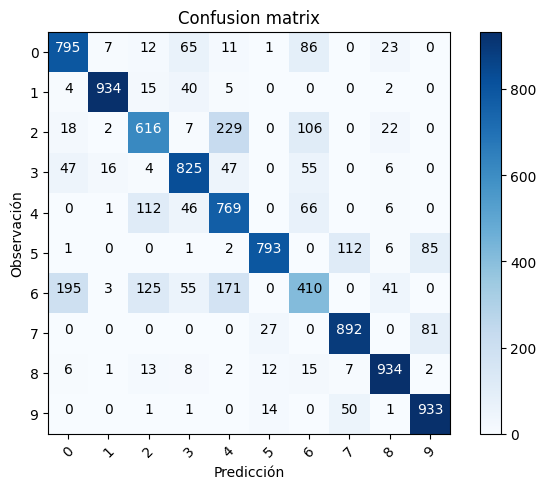

Modelo:  2
313/313 [==============================] - 1s 4ms/step
Matriz de Confusión:


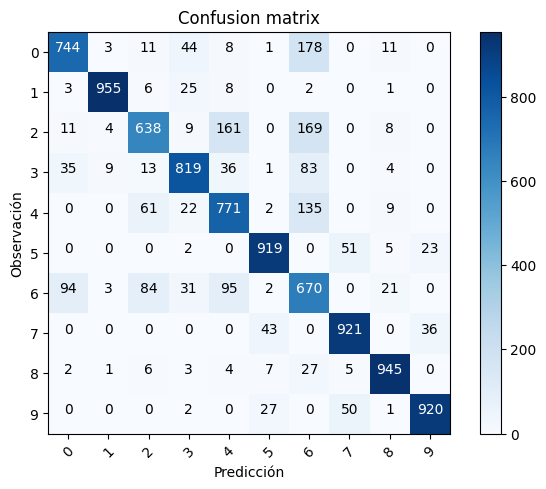

Modelo:  3
313/313 [==============================] - 1s 3ms/step
Matriz de Confusión:


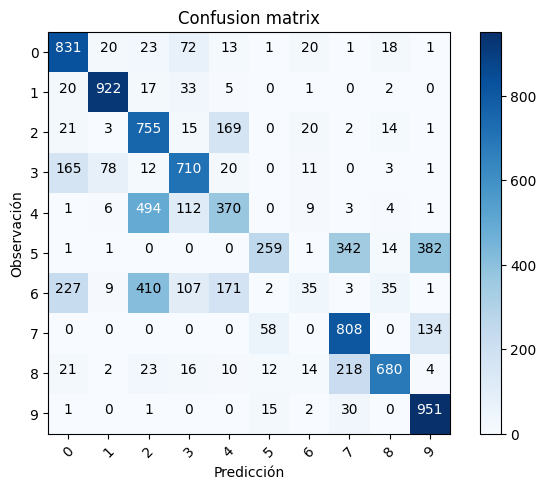

Modelo:  4
313/313 [==============================] - 1s 2ms/step
Matriz de Confusión:


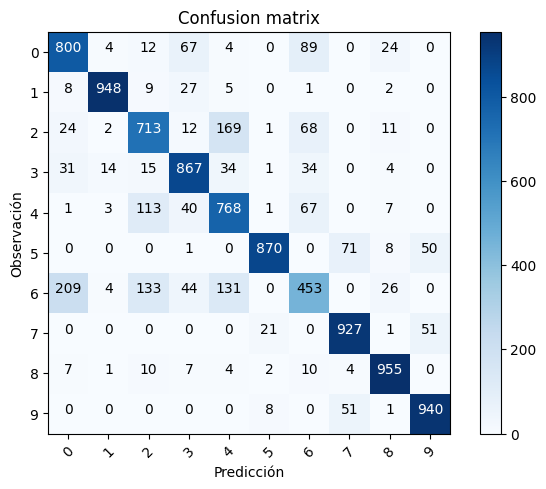

Modelo:  5
313/313 [==============================] - 1s 4ms/step
Matriz de Confusión:


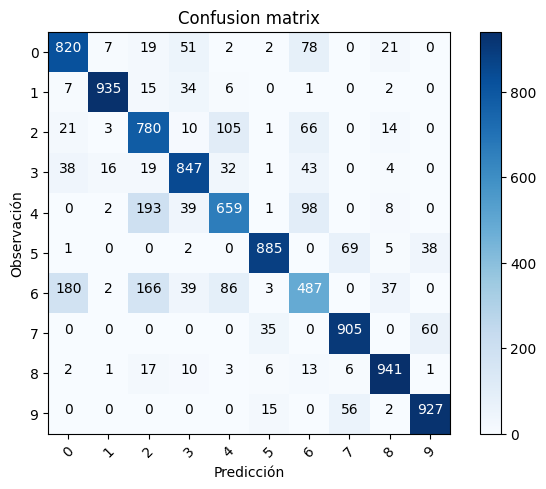

Modelo:  6
313/313 [==============================] - 1s 3ms/step
Matriz de Confusión:


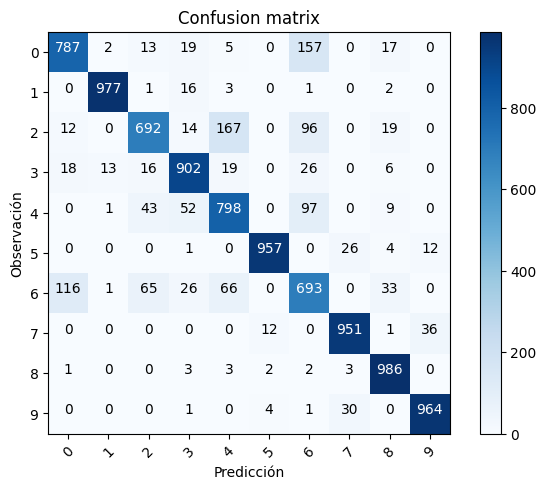

Modelo:  7
313/313 [==============================] - 2s 5ms/step
Matriz de Confusión:


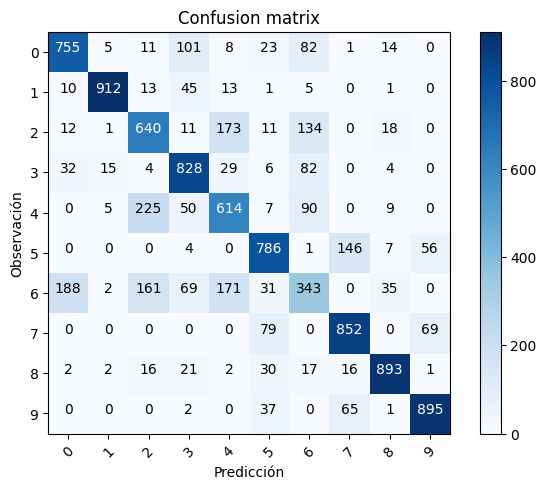

Modelo:  8
313/313 [==============================] - 2s 5ms/step
Matriz de Confusión:


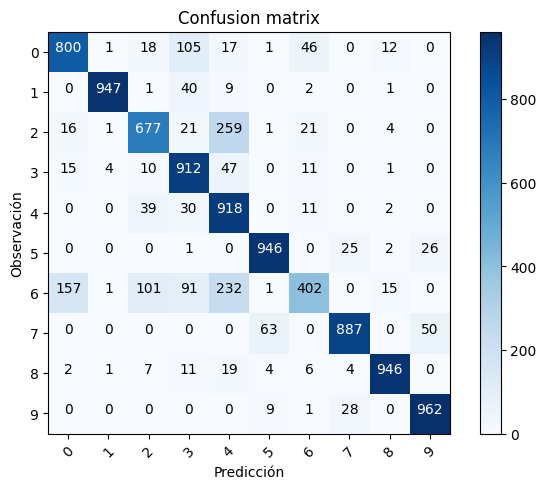

In [ ]:

for i in range(8):
  print("Modelo: ", i+1)
  # Predicción de valores desde el dataset de validación
  Y_pred = network[i].predict(test_images)
  # Convertir en predicciones de clases desde los vectores one-hot encoding
  Y_pred_classes = np.argmax(Y_pred, axis = 1)
  # Convertir en clases de observación desde los vectores one-hot encoding
  Y_true = np.argmax(test_labels_Cat, axis = 1)
  # Calcular la matriz de confusión
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
  print("Matriz de Confusión:")
  plot_confusion_matrix(confusion_mtx, classes = range(10))
  plt.show()

Con las matrices de confusión, se observa de una manera más clara qué modelo hace mejores predicciones, los cuales son el modelo 6 y 8. En cambio, los modelos 3 y 7 son los que peor predicen.

### **PUNTO 5**

Uso de cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de test.



Primero vamos a analizar cual es la test_images[5] para hacernos una idea de cual es el resultado y si nuestros modelos son lo suficientemente fiables. Por otro lado, vamos a crear una variable con los nombres de las prendas para entender mejor los resultados.

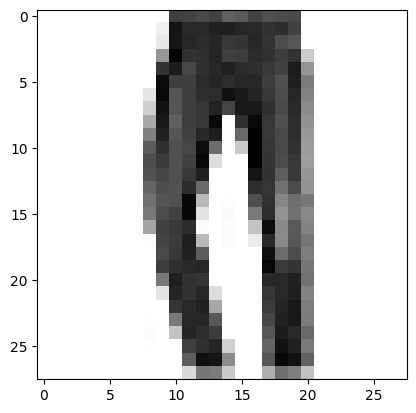

Etiqueta: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Que equivale a la prenda:  T-shirt/Top


In [ ]:
#mostramos la imagen que nos interesa
prueba = test_images[5].reshape(28,28)
plt.imshow(prueba, cmap=plt.cm.binary)
plt.show()
print("Etiqueta:",test_labels_Cat[5])

clasific = ["T-shirt/Top","Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker","Bag", "Ankle Boot"]
print("Que equivale a la prenda: ", clasific[np.argmax(test_labels[5])])


Calculamos las prediciones de la sexta imagen con los 8 modelos y observamos que todos ellos aciertan. Cabe destacar que algunos modelos tienen peores prediciones que otros, como es el caso del tercero. También calculamos la suma de todos los elementos del vector de prediciones y observamos que es 1 en todos los casos (Esto se debe a que estamos trabajando con probabilidades)

In [ ]:
all_predictions = []
for i in range(8):
    print("MODELO:", i+1)

    # Hacemos las predicciones con las imágenes de Test
    predictions = network[i].predict(test_images)

    print("PREDICCIÓN OBTENIDA: " )
    print(predictions[5])
    print("SUMA DEL VECTOR: ", np.sum(predictions[5]) )
    print("Prenda obtenida: ",clasific[np.argmax(predictions[5])])
    print("\n")
    all_predictions.append(predictions)
    #explicar poruqe tiene q dar 1(PRobabilidad) y poner si el maximo coincide con la label
    #crear tambien un vector con los nombre de las prendas

MODELO: 1
313/313 [==============================] - 1s 2ms/step
PREDICCIÓN OBTENIDA: 
[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
SUMA DEL VECTOR:  1.0
Prenda obtenida:  Trouser


MODELO: 2
313/313 [==============================] - 0s 2ms/step
PREDICCIÓN OBTENIDA: 
[0.   0.98 0.   0.   0.02 0.   0.   0.   0.   0.  ]
SUMA DEL VECTOR:  1.0
Prenda obtenida:  Trouser


MODELO: 3
313/313 [==============================] - 1s 2ms/step
PREDICCIÓN OBTENIDA: 
[0.22 0.43 0.05 0.12 0.04 0.02 0.07 0.01 0.02 0.02]
SUMA DEL VECTOR:  1.0000001
Prenda obtenida:  Trouser


MODELO: 4
313/313 [==============================] - 1s 2ms/step
PREDICCIÓN OBTENIDA: 
[0.   0.98 0.   0.01 0.   0.   0.   0.   0.   0.  ]
SUMA DEL VECTOR:  1.0000001
Prenda obtenida:  Trouser


MODELO: 5
313/313 [==============================] - 1s 4ms/step
PREDICCIÓN OBTENIDA: 
[0.01 0.97 0.   0.   0.01 0.   0.   0.   0.   0.  ]
SUMA DEL VECTOR:  1.0
Prenda obtenida:  Trouser


MODELO: 6
313/313 [========================

### **PUNTO 6**
Uso de las funciones proprocionadas para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos

Modelo: 1


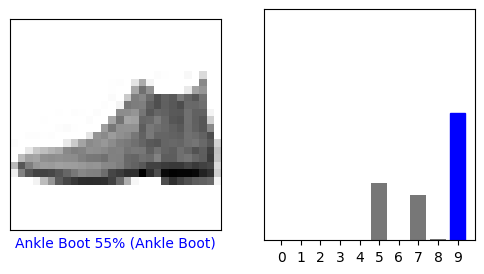

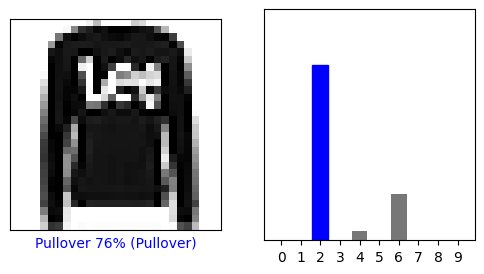

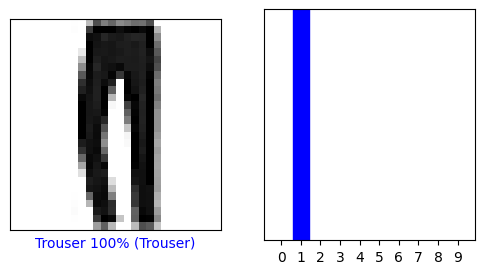

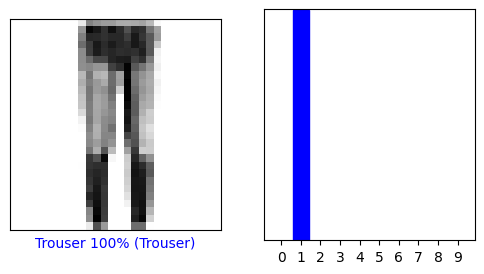

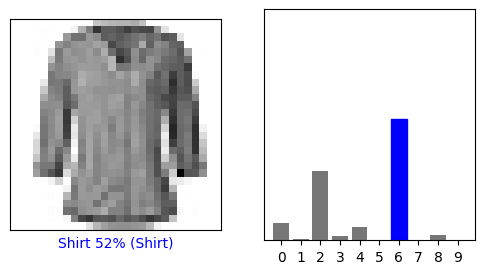

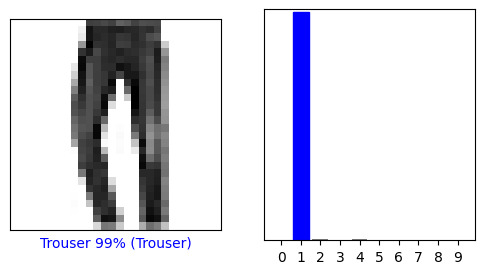

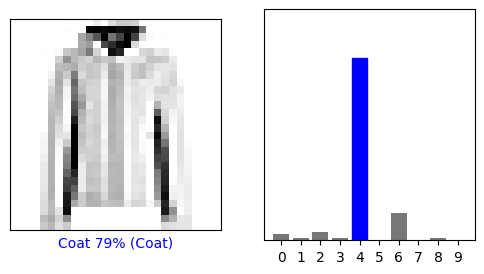

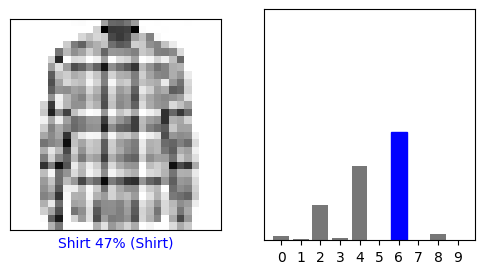

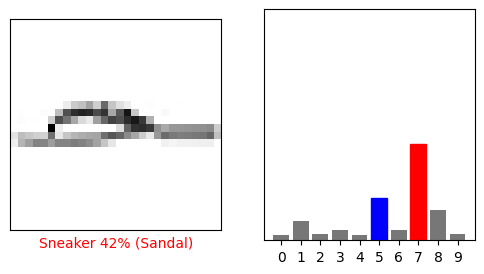

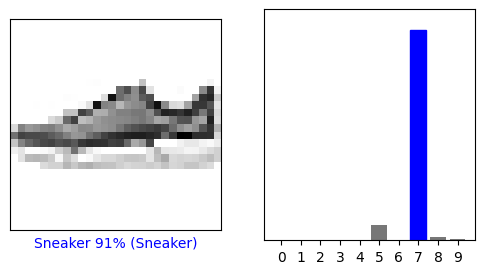

Modelo: 2


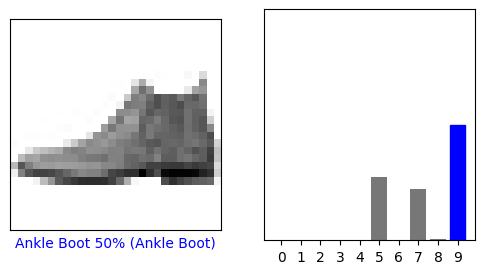

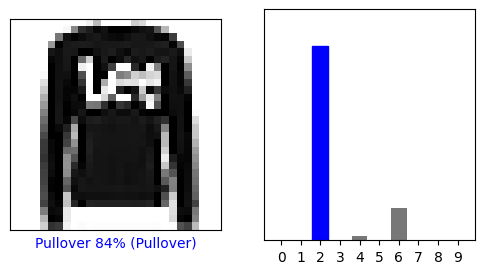

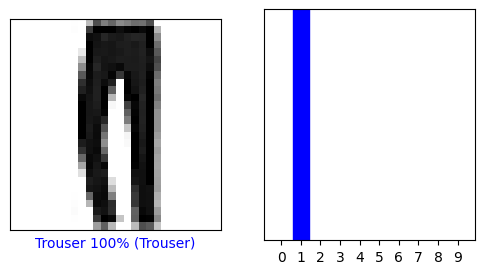

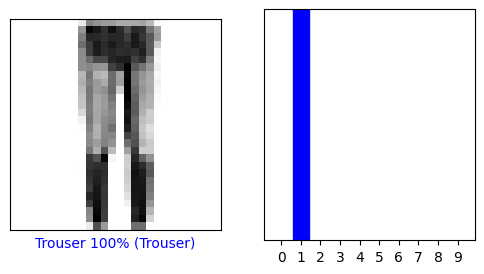

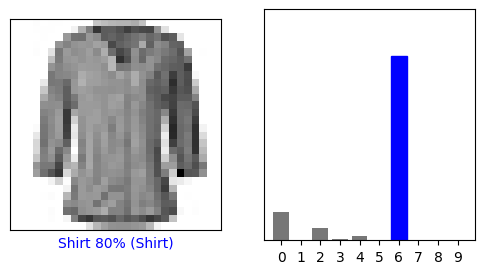

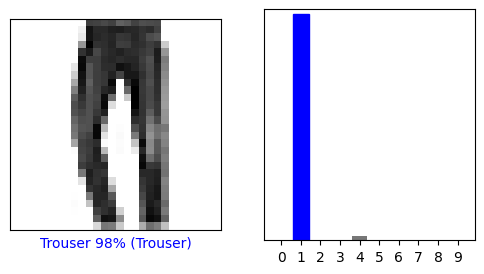

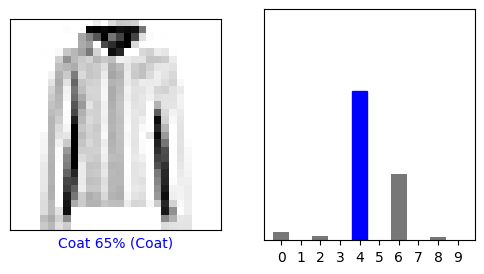

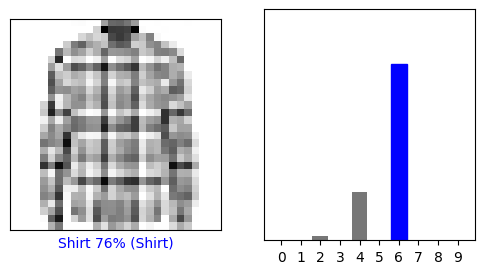

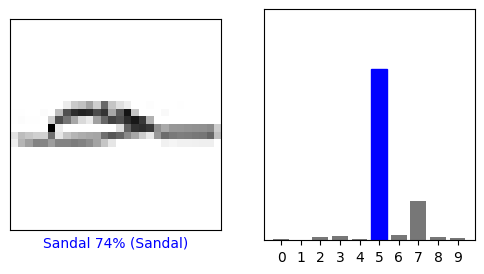

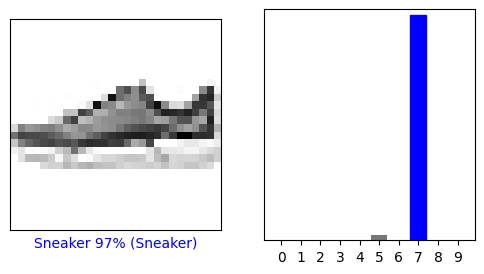

Modelo: 3


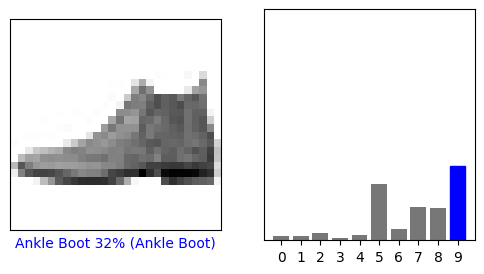

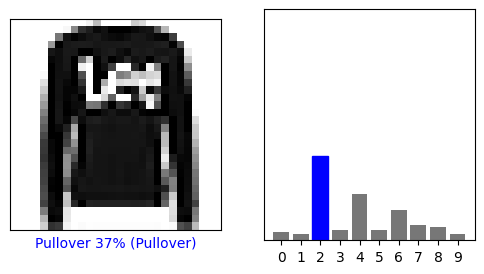

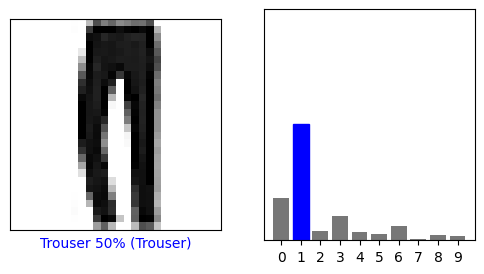

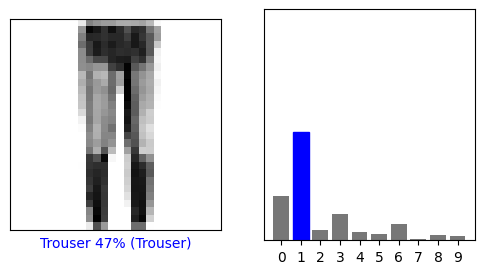

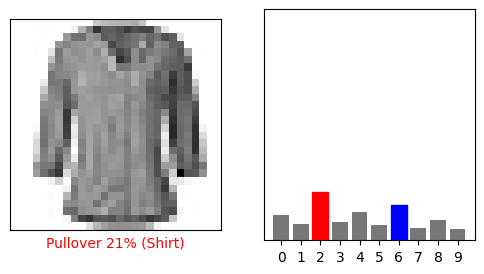

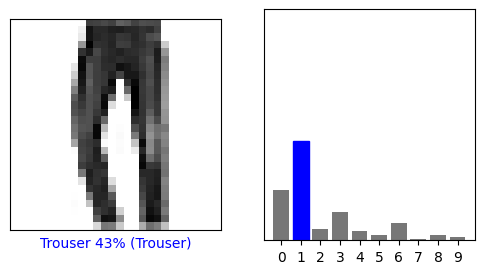

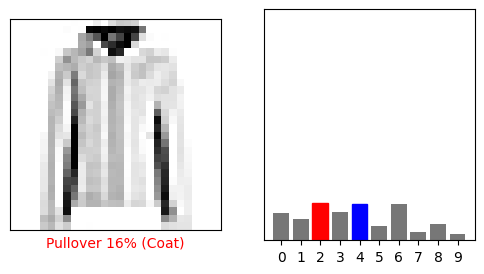

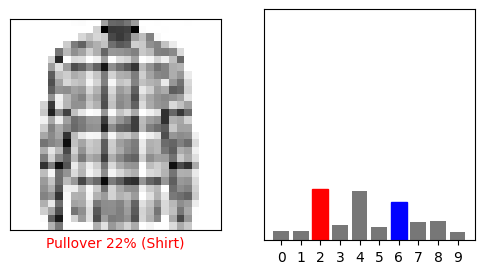

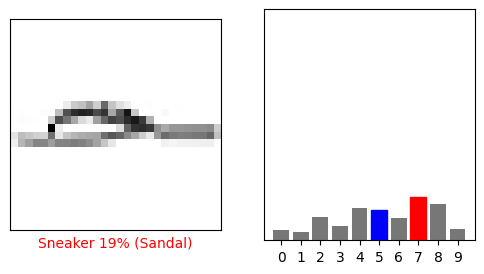

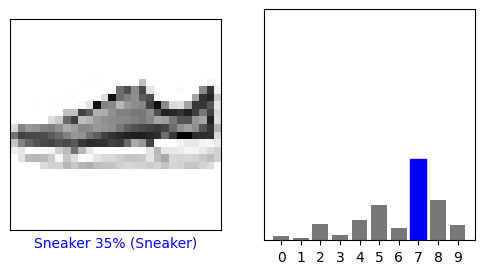

Modelo: 4


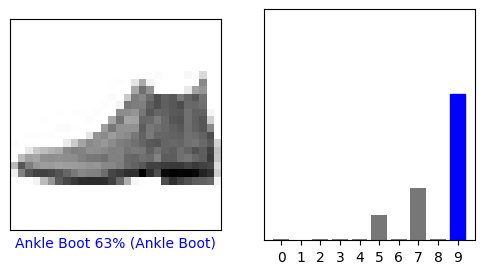

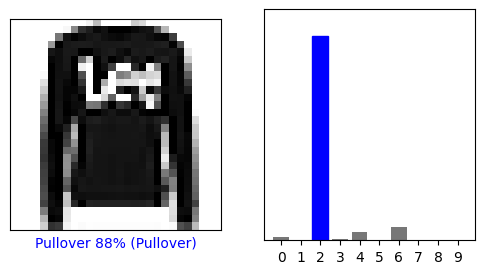

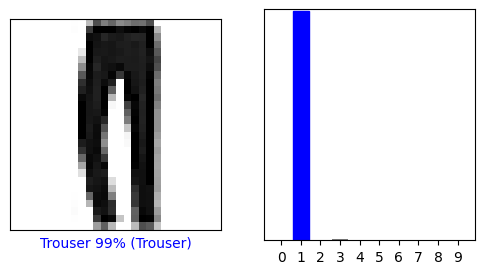

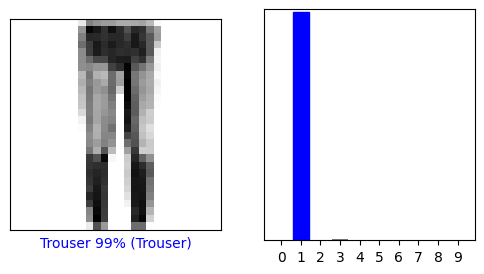

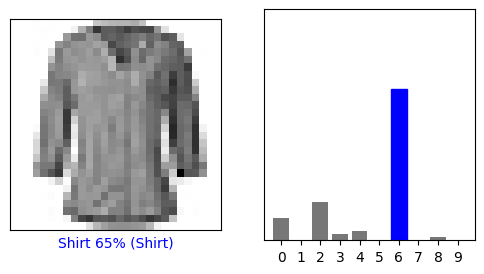

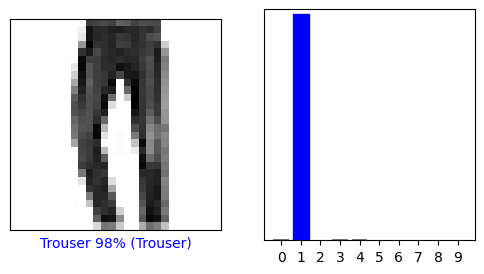

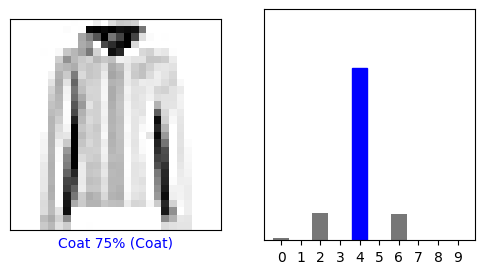

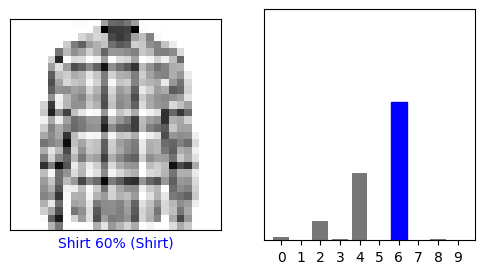

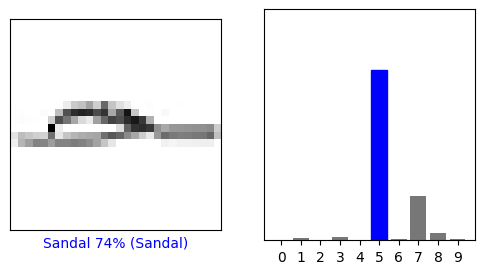

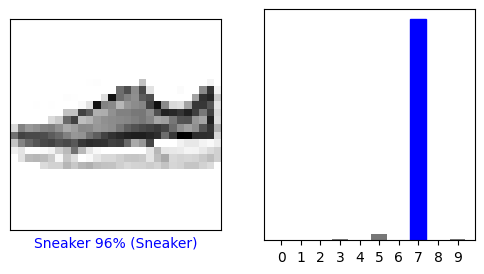

Modelo: 5


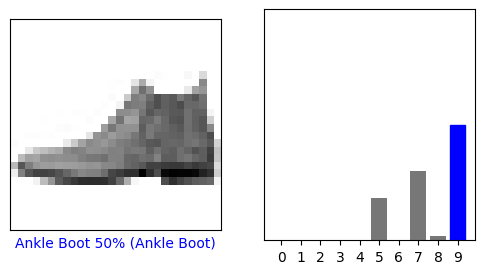

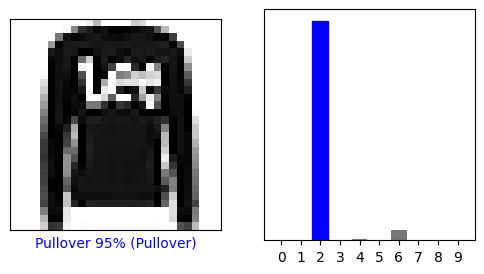

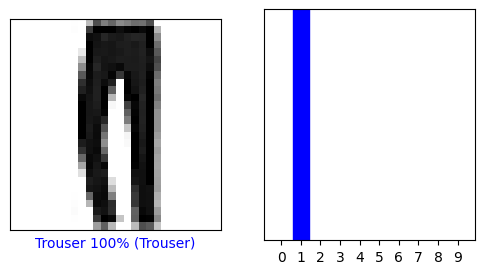

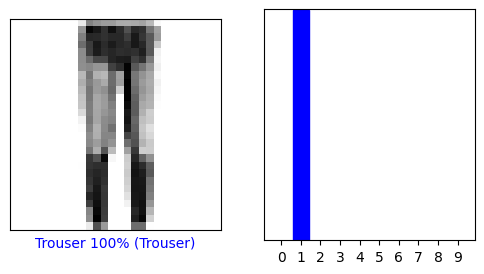

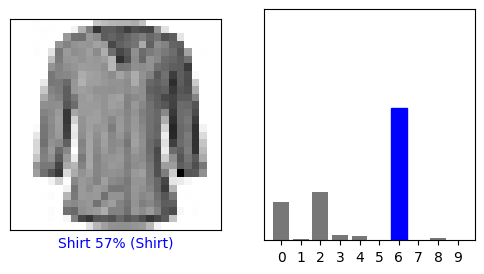

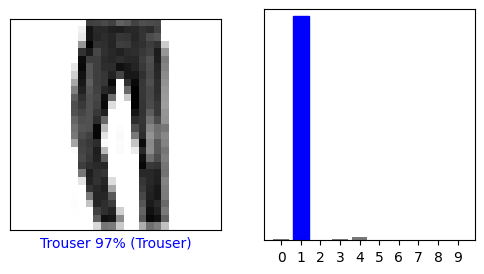

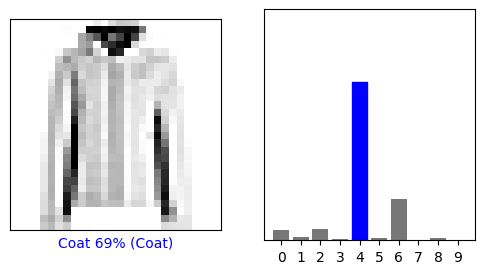

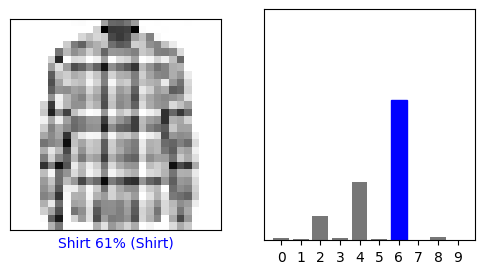

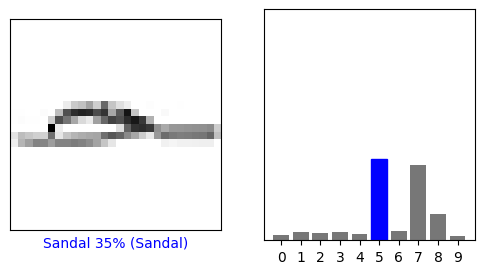

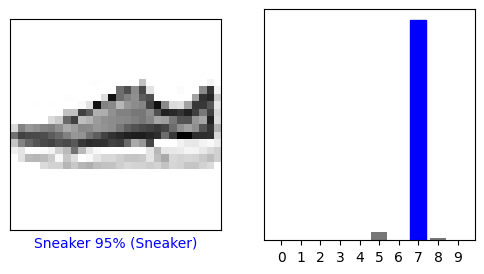

Modelo: 6


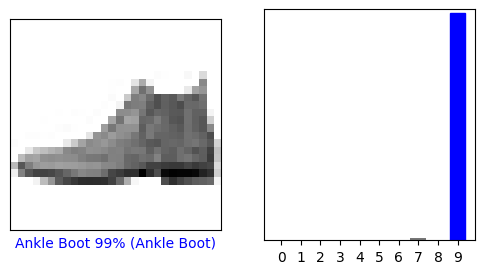

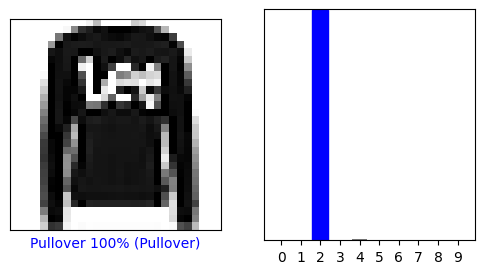

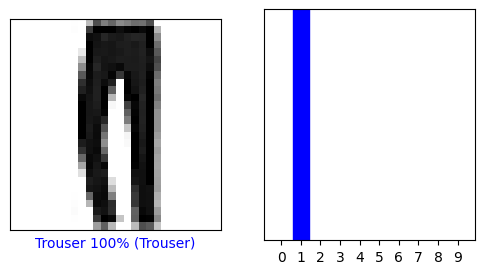

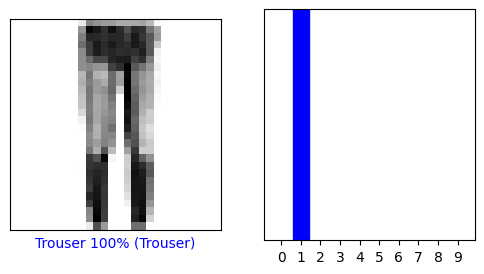

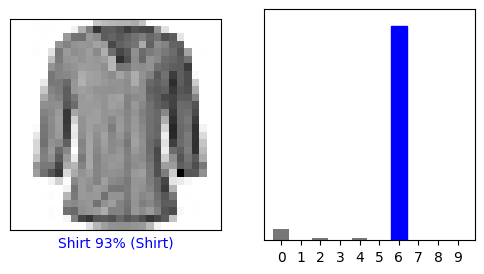

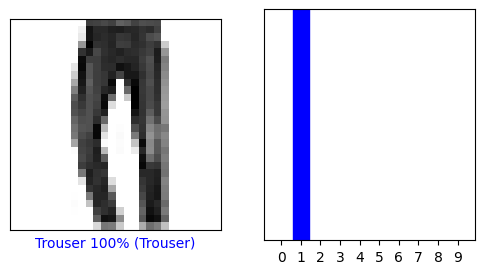

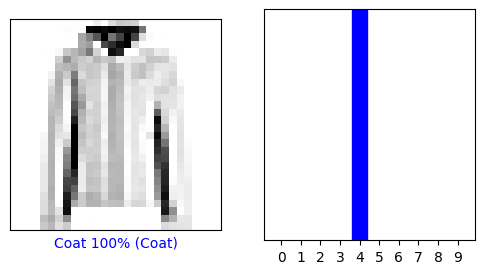

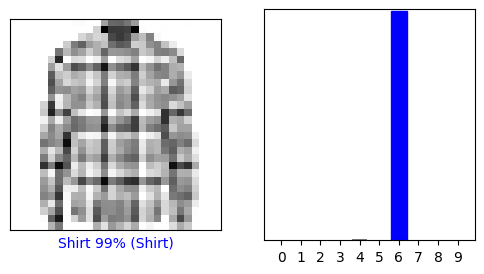

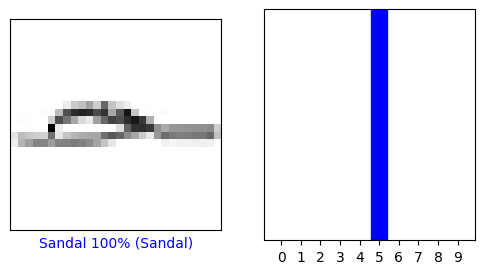

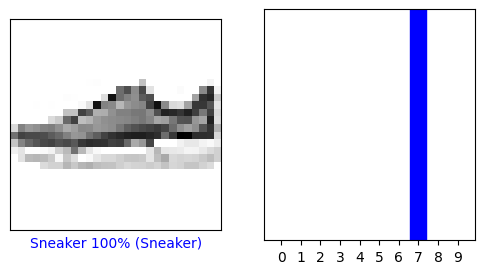

Modelo: 7


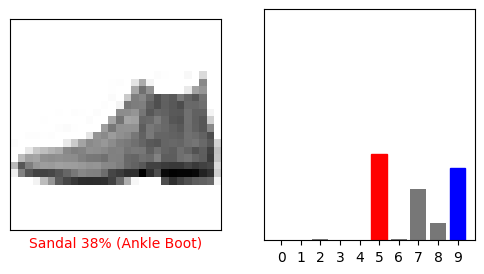

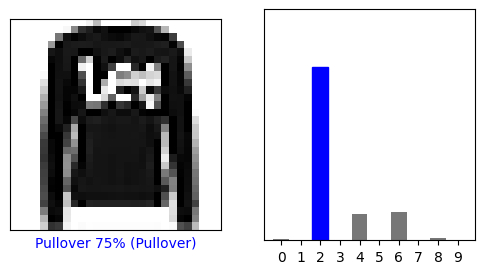

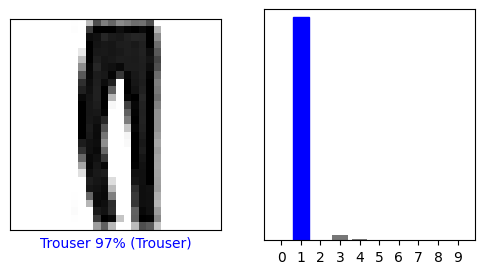

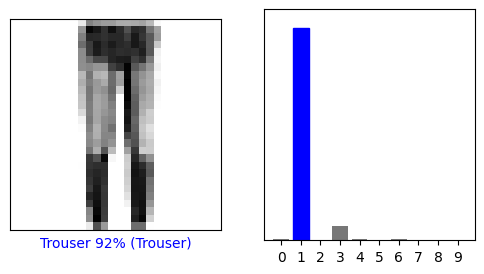

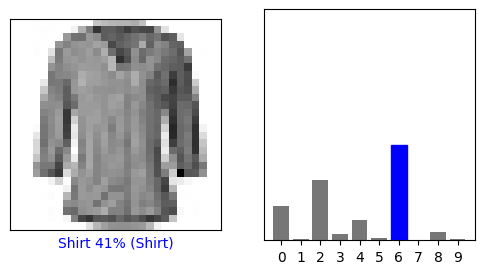

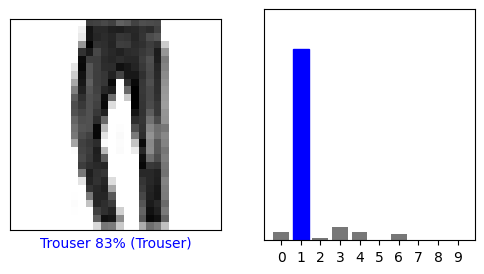

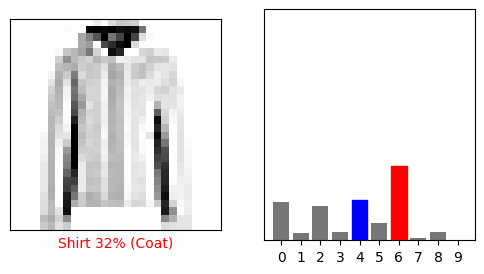

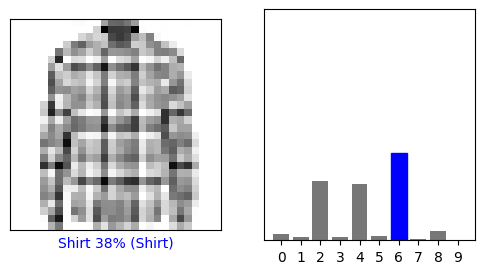

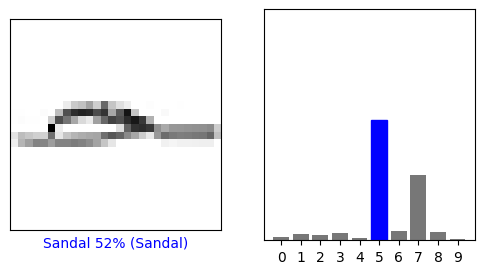

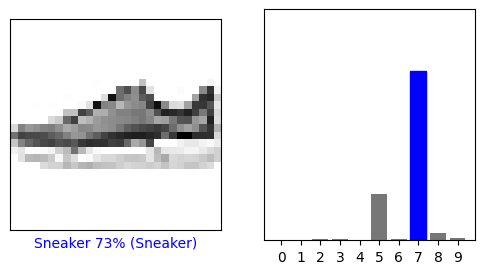

Modelo: 8


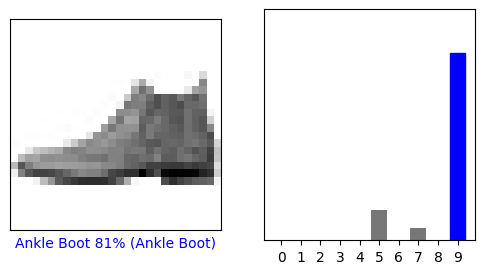

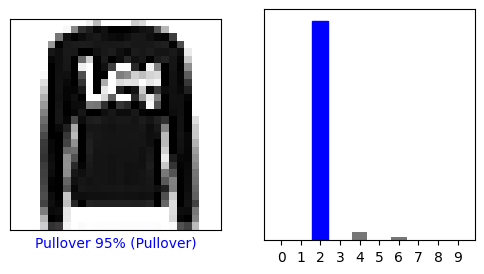

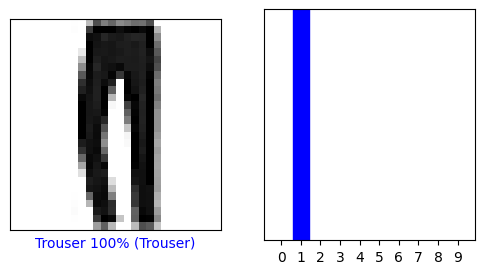

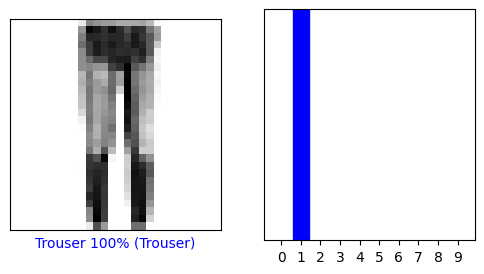

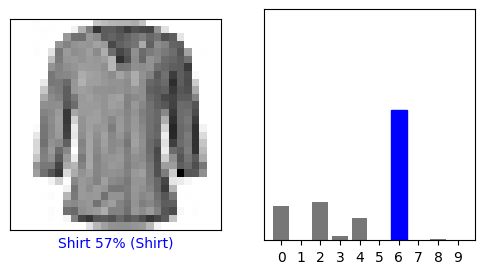

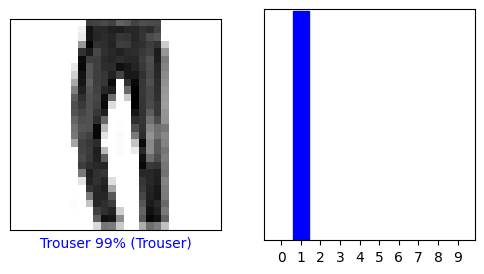

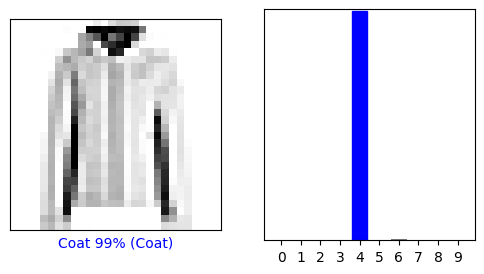

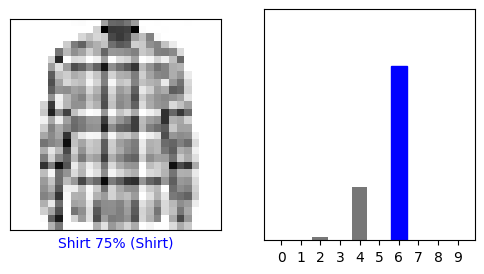

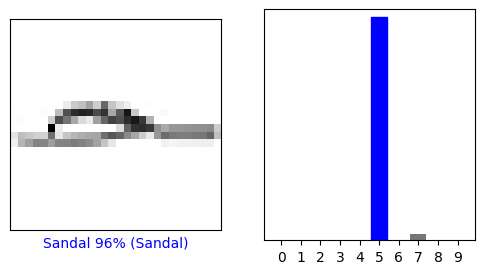

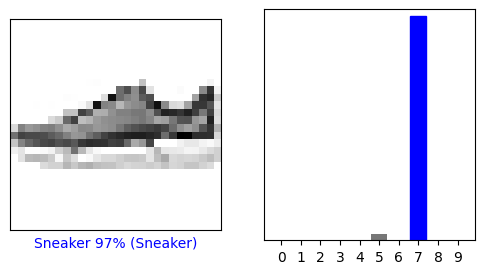

In [ ]:
for j in range(8): #Modelos del 1 al 8
  print("Modelo:", j+1)
  for i in range(10): #Primeras 10 imagenes
    plt.figure(figsize = (6,3))
    plt.subplot(1,2,1)
    plot_image(i, all_predictions[j][i], test_labels, test_images,clasific)
    plt.subplot(1,2,2)
    plot_value_array(i,all_predictions[j][i], test_labels)
    plt.show()


Gracias a estas gráficas nos queda mucho más claro el rendimiento de cada uno de los modelos. Para hacernos una idea, si el modelo acierta aparece el resultado en azul y si el modelo falla aparece el resultado obtenido en rojo y el deseado en azul.
En general observamos que la prenda donde más suelen fallar los modelos es en chanclas, zapatillas y similares. A su vez observamos que a muchos modelos les cuesta reconocer camisetas de sudaderas o camisas. En cambio los pantalones los suelen reconocer en un porcentaje mucho más alto. Esto es debido a la naturaleza de los datos, ya que alguna de las categorias es mucho más reconocible.
Se observa que, como se había mencionado anteriormente analizando el rendimiento, modelos como el 8 tienen mucha más precisión que otros como el 3.


### **PUNTO 7**
Mejora del modelo del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’.

In [ ]:
#volvemos a pasar a no-categoricas las etiquetas para evitar errores
#train_labels = [np.argmax(k) for k in train_labels]
modelo = crear_Network (NNeuronasC1[2], Fa[2], 'adam','sparse_categorical_crossentropy')
modelo.summary()
modelo = entrenar(modelo, 5, train_labels)
evaluar(modelo, test_labels)


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 784)               0         
                                                                 
 dense_64 (Dense)            (None, 10)                7850      
                                                                 
 dense_65 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 1.5094 - accuracy: 0.5886
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.8994 - accuracy: 0.7480
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.6997 - accuracy: 0.7954
Epoch 4/5
469/469

El optimizador adam es una combinación de los dos optimizadores que se han utilizado, el SGD y el RMSprop. Adam adapta cada parámetro individualmente en vez de usar una tasa de aprendizaje común a todos. Por ello, los resultados obtenidos respecto a la perdida y la precisión son claramente mejores (Pasa de un 60% a un 80%).

En cuanto a la función de activación sparse_categorical_crossentropy, se utiliza en problemas de clasificación donde hay instancias relacionadas cada una con una clase. Es una variante de Categorical Crossentropy, se utiliza para pasar las etiquetas a one-hot y calcular a partir de ahí la función de pérdida con Categorical Crossentropy tradicional. Gracias a esta función la entrada de datos al sistema es mejor, se simplifica, y será más eficiente. Gracias a esto, no hace falta entrenar el modelo con las etiquetas ya categóricas, funciona directamente con las etiquetas básicas.



## CONCLUSIONES

En esta práctica, se ha adquirido experiencia en el desarrollo y entrenamiento de modelos de redes neuronales artificiales para la clasificación de imágenes. A lo largo del proceso, se ha visto que el preprocesamiento de datos desempeña un papel crucial para garantizar que el modelo pueda aprender de manera eficaz. La normalización de imágenes y la transformación de etiquetas en formato one-hot encoding son prácticas muy útiles.

Se ha experimentado con diferentes arquitecturas de redes, explorando la elección de funciones de activación y optimizadores, y se ha evaluado el rendimiento de los modelos. Se ha observado que todas estas variables son fundamentales para el rendimiento de los modelos, ya que al probar las distintas combinaciones se han obtenido casos diversos. Por otro lado, se han utilizado maneras gráficas para analizar los resultados y así comprender mejor el comportamiento y las decisiones de la red.




